## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [2]:
from google.colab import files
files.upload()

Saving heart.csv to heart.csv


{'heart.csv': b'\xef\xbb\xbfage,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target\r\n63,1,3,145,233,1,0,150,0,2.3,0,0,1,1\r\n37,1,2,130,250,0,1,187,0,3.5,0,0,2,1\r\n41,0,1,130,204,0,0,172,0,1.4,2,0,2,1\r\n56,1,1,120,236,0,1,178,0,0.8,2,0,2,1\r\n57,0,0,120,354,0,1,163,1,0.6,2,0,2,1\r\n57,1,0,140,192,0,1,148,0,0.4,1,0,1,1\r\n56,0,1,140,294,0,0,153,0,1.3,1,0,2,1\r\n44,1,1,120,263,0,1,173,0,0,2,0,3,1\r\n52,1,2,172,199,1,1,162,0,0.5,2,0,3,1\r\n57,1,2,150,168,0,1,174,0,1.6,2,0,2,1\r\n54,1,0,140,239,0,1,160,0,1.2,2,0,2,1\r\n48,0,2,130,275,0,1,139,0,0.2,2,0,2,1\r\n49,1,1,130,266,0,1,171,0,0.6,2,0,2,1\r\n64,1,3,110,211,0,0,144,1,1.8,1,0,2,1\r\n58,0,3,150,283,1,0,162,0,1,2,0,2,1\r\n50,0,2,120,219,0,1,158,0,1.6,1,0,2,1\r\n58,0,2,120,340,0,1,172,0,0,2,0,2,1\r\n66,0,3,150,226,0,1,114,0,2.6,0,0,2,1\r\n43,1,0,150,247,0,1,171,0,1.5,2,0,2,1\r\n69,0,3,140,239,0,1,151,0,1.8,2,2,2,1\r\n59,1,0,135,234,0,1,161,0,0.5,1,0,3,1\r\n44,1,2,130,233,0,1,179,1,0.4,2,0,2,1\r\n42,1,0,140,226,

## Read Dataset

In [4]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Show the information of data to find any null value

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Show the statistical summary of data

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Show the value of taget column

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
# Show correlation between columns

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Negative (0):  165
Positive (0):  138


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


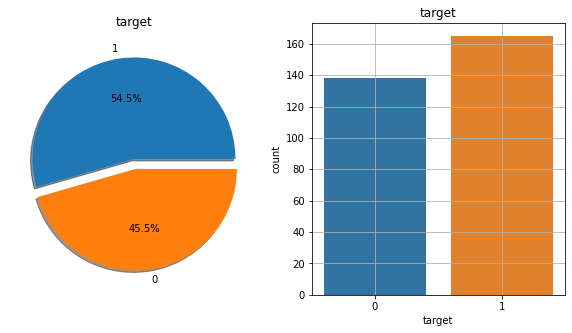

In [9]:
# Count plot of target data

f, ax=plt.subplots(1,2,figsize=(10,5))
df['target'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sb.countplot('target', data=df, ax=ax[1])
ax[1].set_title('target')
N,P = df['target'].value_counts()
print('Negative (0): ', N)
print('Positive (0): ', P)
plt.grid()
plt.show()

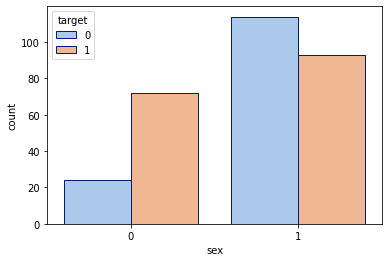

In [10]:
# Visualize disease rate subjectedly gender

sb.countplot(x='sex',hue='target',data=df,palette='pastel',edgecolor=sb.color_palette('dark',n_colors=1))

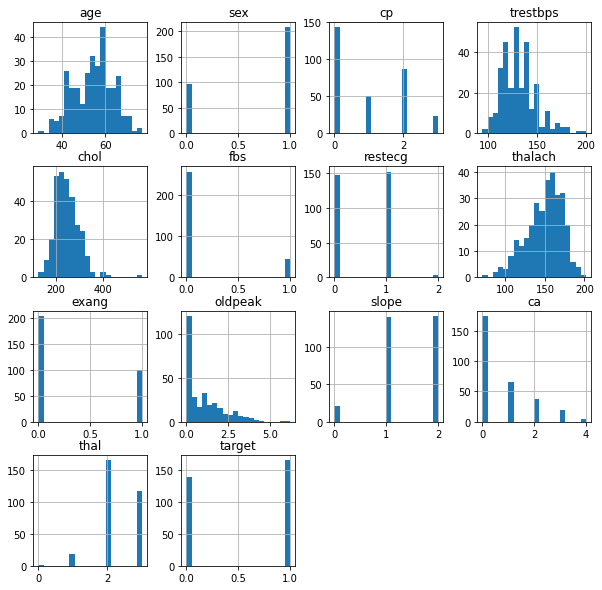

In [11]:
# Histogram of columns

df.hist(bins=20,figsize=(10,10))
plt.show()

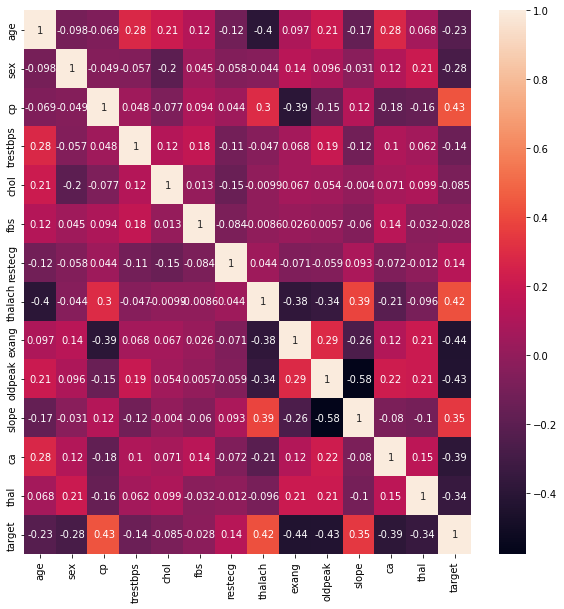

In [12]:
# Correlation analysis

corrmat=df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

#plot heat map

g = sb.heatmap(df[top_corr_features].corr(), annot=True)

In [13]:
target_name='target'

# Separate object for target feature
y = df[target_name]

# Separate object for input feature
x = df.drop(target_name, axis=1)

In [14]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [17]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
34,51,1,3,125,213,0,0,125,1,1.4,2,1,2
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
147,60,0,3,150,240,0,1,171,0,0.9,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3


In [18]:
y_train

34     1
185    0
187    0
147    1
202    0
      ..
203    0
255    0
72     1
235    0
37     1
Name: target, Length: 212, dtype: int64

In [19]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1


In [20]:
y_test

204    0
159    1
219    0
174    0
184    0
      ..
106    1
105    1
67     1
291    0
247    0
Name: target, Length: 91, dtype: int64

Random Forest

In [21]:
from sklearn. ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [22]:
print("Train Accuracy of Random Forest Algorithm ", rf.score(x_train,y_train)*100)
print("Test Accuracy score of Random Forest Algorithm ", rf.score(x_test,y_test)*100)

Train Accuracy of Random Forest Algorithm  100.0
Test Accuracy score of Random Forest Algorithm  74.72527472527473


Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
print("Train Accuracy of Decision Tree Algorithm ", dt.score(x_train,y_train)*100)
print("Test Accuracy score of Decision Tree Algorithm ", dt.score(x_test,y_test)*100)

Train Accuracy of Decision Tree Algorithm  100.0
Test Accuracy score of Decision Tree Algorithm  72.52747252747253


Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

In [26]:
print("Train Accuracy of Logistic Regression ", lr.score(x_train,y_train)*100)
print("Test Accuracy score of Logistic Regression ", lr.score(x_test,y_test)*100)

Train Accuracy of Logistic Regression  87.26415094339622
Test Accuracy score of Logistic Regression  79.12087912087912


K-Nearest Neighbor(KNN)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
print("Train Accuracy of KNN Algorithm ", knn.score(x_train,y_train)*100)
print("Test Accuracy score of KNN Algorithm ", knn.score(x_test,y_test)*100)

Train Accuracy of KNN Algorithm  77.35849056603774
Test Accuracy score of KNN Algorithm  59.34065934065934


Naive-Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [30]:
print("Train Accuracy of Naive-Bayes Algorithm ", nb.score(x_train,y_train)*100)
print("Test Accuracy score of Naive-Bayes Algorithm ", nb.score(x_test,y_test)*100)

Train Accuracy of Naive-Bayes Algorithm  83.9622641509434
Test Accuracy score of Naive-Bayes Algorithm  79.12087912087912


In [31]:
# Prediction on test using random forest

rf_pred = rf.predict(x_test)

In [33]:
# Prediction on test using decision tree

dt_pred = dt.predict(x_test)

In [34]:
# Prediction on test using logistic regression

lr_pred = lr.predict(x_test)

In [35]:
# Prediction on test using KNN

knn_pred = knn.predict(x_test)

In [36]:
# Prediction on test using naive bayes

nb_pred = nb.predict(x_test)

# Confusion Matrix

Random Forest Algorithm

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, rf_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 29
FP 12
FN 11
TP 39
Accuracy rate 74.72527472527473
Misclassification rate 25.274725274725274


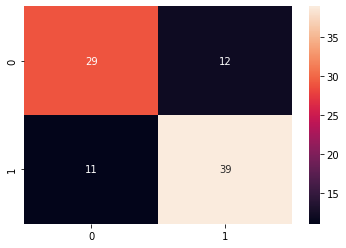

In [38]:
sb.heatmap(confusion_matrix(y_test, rf_pred), annot=True,fmt="d")

Decision Tree Algorithm

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, dt_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 31
FP 10
FN 15
TP 35
Accuracy rate 72.52747252747253
Misclassification rate 27.472527472527474


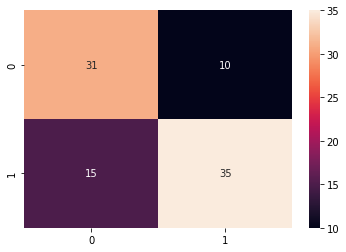

In [40]:
sb.heatmap(confusion_matrix(y_test, dt_pred), annot=True,fmt="d")

Logistic Regretion Algorithm

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, lr_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 29
FP 12
FN 7
TP 43
Accuracy rate 79.12087912087912
Misclassification rate 20.87912087912088


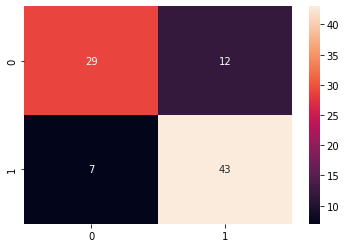

In [42]:
sb.heatmap(confusion_matrix(y_test, lr_pred), annot=True,fmt="d")

K-Nearest Neighbor(KNN)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, knn_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 20
FP 21
FN 16
TP 34
Accuracy rate 59.34065934065934
Misclassification rate 40.65934065934066


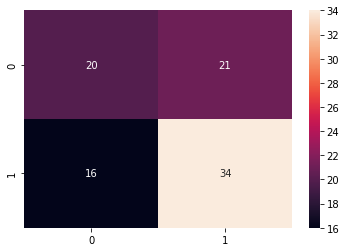

In [44]:
sb.heatmap(confusion_matrix(y_test, knn_pred), annot=True,fmt="d")

Naive-Bayes

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(y_test, nb_pred)

print('TN {}'.format(cm[0,0]))
print('FP {}'.format(cm[0,1]))
print('FN {}'.format(cm[1,0]))
print('TP {}'.format(cm[1,1]))
print('Accuracy rate {}'.format(np.divide(np.sum([cm[0,0], cm[1,1]]), np.sum(cm))*100))
print('Misclassification rate {}'.format(np.divide(np.sum([cm[0,1], cm[1,0]]), np.sum(cm))*100))

TN 32
FP 9
FN 10
TP 40
Accuracy rate 79.12087912087912
Misclassification rate 20.87912087912088


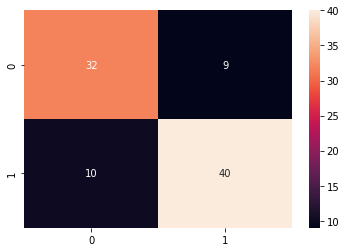

In [46]:
sb.heatmap(confusion_matrix(y_test, nb_pred), annot=True,fmt="d")